#### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### IMPORT FUNCTIONS

In [2]:
# create function to impute missing values using regression based on HH SZ, REGION, AND YEAR
def impute_missing_values(df, target_col, feature_cols):
    # Split the data into training and test sets
    
    not_null_df = df[df[target_col].notnull()]
    null_df = df[df[target_col].isnull()]
    try:
        if (not_null_df['YEAR'].nunique() == 5) & (not_null_df['REGION 2'].nunique() == 6):

            X_train = not_null_df[['HH SZ','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019',
                               'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD']]

            y_train = not_null_df[target_col]
            X_test = null_df[['HH SZ','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019',
                               'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD']]

            # Train the regression model
            reg = LinearRegression()
            reg.fit(X_train, y_train)

            # Predict the missing values
            y_pred = reg.predict(X_test)
            y_pred = np.maximum(y_pred, 0.01)

            # Impute the missing values
            df.loc[df[target_col].isnull(), target_col] = y_pred
    except:
        None
        
        
# create function to impute missing values using regression based on HH SZ and REGION
def impute_missing_values2(df, target_col, feature_cols):
    # Split the data into training and test sets
    
    not_null_df = df[df[target_col].notnull()]
    null_df = df[df[target_col].isnull()]
    try:
        if (not_null_df['REGION 2'].nunique() == 6):

            X_train = not_null_df[['HH SZ',
                               'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD']]

            y_train = not_null_df[target_col]
            X_test = null_df[['HH SZ',
                               'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD']]

            # Train the regression model
            reg = LinearRegression()
            reg.fit(X_train, y_train)

            # Predict the missing values
            y_pred = reg.predict(X_test)
            y_pred = np.maximum(y_pred, 0.01)

            # Impute the missing values
            df.loc[df[target_col].isnull(), target_col] = y_pred
    except:
        None

        
# create function to impute missing values using regression based on HH SZ and YEAR 
def impute_missing_values3(df, target_col, feature_cols):
    # Split the data into training and test sets
    
    not_null_df = df[df[target_col].notnull()]
    null_df = df[df[target_col].isnull()]
    try:
        if (not_null_df['YEAR'].nunique() == 5):

            X_train = not_null_df[['HH SZ','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019']]

            y_train = not_null_df[target_col]
            X_test = null_df[['HH SZ','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019']]

            # Train the regression model
            reg = LinearRegression()
            reg.fit(X_train, y_train)

            # Predict the missing values
            y_pred = reg.predict(X_test)
            y_pred = np.maximum(y_pred, 0.01)

            # Impute the missing values
            df.loc[df[target_col].isnull(), target_col] = y_pred
    except:
        None
        
        
# create function to impute missing values using regression based on HH SZ
def impute_missing_values4(df, target_col, feature_cols):
    # Split the data into training and test sets
    try:
        not_null_df = df[df[target_col].notnull()]
        null_df = df[df[target_col].isnull()]

        X_train = not_null_df[['HH SZ']]

        y_train = not_null_df[target_col]
        X_test = null_df[['HH SZ']]

        # Train the regression model
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        # Predict the missing values
        y_pred = reg.predict(X_test)
        y_pred = np.maximum(y_pred, 0.01)

        # Impute the missing values
        df.loc[df[target_col].isnull(), target_col] = y_pred
    except:
        None

#### IMPORT PROJECTION FACTORS

In [3]:
# projection factors
df19pf = pd.read_csv('2019/TGI_FACTOR_MAT_20191228.CSV', header=None)
df19pf.columns = ['HHID', 'REGION', 'PF']
df19pf['YEAR'] = 2019

df18pf = pd.read_csv('2018/TGI_FACTOR_MAT_20181229.CSV', header=None)
df18pf.columns = ['HHID', 'REGION', 'PF']
df18pf['YEAR'] = 2018

df17pf = pd.read_csv('2017/TGI_FACTOR_MAT_20171230.CSV', header=None)
df17pf.columns = ['HHID', 'REGION', 'PF']
df17pf['YEAR'] = 2017

df16pf = pd.read_csv('2016/TGI_FACTOR_MAT_20161231.CSV', header=None)
df16pf.columns = ['HHID', 'REGION', 'PF']
df16pf['YEAR'] = 2016

df15pf = pd.read_csv('2015/TGI_FACTOR_MAT_20151226.CSV', header=None)
df15pf.columns = ['HHID', 'REGION', 'PF']
df15pf['YEAR'] = 2015

dfpf = pd.concat([df15pf, df16pf, df17pf, df18pf, df19pf])
dfpf['YEAR-HHID'] = dfpf['YEAR'].astype(str) + '|' + dfpf['HHID'].astype(str)
dfpf['REGION 2'] = dfpf['REGION'].replace(1, 'SYD').replace(2, 'MEL').replace(3, 'BRI').replace(4, 'ADE').replace(5, 'PER').replace(6, 'Other').replace(7, 'Other').replace(8, 'Other').replace(9, 'Other').replace(10, 'Other').replace(11, 'Other').replace(12, 'Other').replace(13, 'Other')


1	SYDNEY
2	MELBOURNE
3	BRISBANE
4	ADELAIDE
5	PERTH
6	SOUTHERN NSW
7	NORTHERN NSW
8	REGIONAL VIC
9	REGIONAL QLD
10	REGIONAL SA
11	REGIONAL WA
12	TASMANIA
13	NORTHERN TERRITORY

In [4]:
np.round(100*dfpf['REGION 2'].value_counts(normalize=True), 1).cumsum()

Other     30.9
MEL       51.4
SYD       70.6
BRI       84.5
PER       92.6
ADE      100.0
Name: REGION 2, dtype: float64

#### IMPORT HOUSEHOLD INFORMATION

In [5]:
# household size
demog = pd.read_csv('TGI_DEMOG_BY_QTR.CSV')
demog.columns = ['HHID', 'QTR', 'LIFESTAGE', 'HH SZ', 'INCOME', 'AFFLUENCE', 'ETHNICITY',
              'MICROSEGMENT', 'HEAD EDUCATION', 'AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5',
              'AGE6', 'AGE7', 'AGE8', 'AGE9', 'AGE10', 'AGE11', 'AGE12', 'AGE13', 'AGE14', 'AGE15',
              'AGE16', 'AGE17', 'AGE18', 'AGE19', 'AGE20', 'SEX1', 'SEX2', 'SEX3', 'SEX4', 'SEX5',
               'SEX6', 'SEX7', 'SEX8', 'SEX9', 'SEX10','SEX11', 'SEX12', 'SEX13', 'SEX14', 'SEX15',
              'SEX16', 'SEX17', 'SEX18', 'SEX19', 'SEX20']


for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    c1 = ~demog['AGE' + str(n)].isnull()
    c2 = demog['SEX' + str(n)].isnull()
    demog['SEX' + str(n)] = np.where(c1&c2, 1, demog['SEX' + str(n)])
    
demog = demog[demog['HH SZ'] != 0] 

demog['YEAR-HHID'] = demog['QTR'].str.split('-').str[0] + '|' + demog['HHID'].astype(str)

# MORE DEMOGRPAHIC VARIABLES
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    demog['P' + str(n)] = demog['SEX' + str(n)].fillna('0').replace(1, 'M').replace(2, 'F') + demog['AGE' + str(n)].fillna('0').astype(int).astype(str)

adult_men = {'M3', 'M4', 'M5', 'M6', 'M7', 'M8'}
adult_women = {'F3', 'F4', 'F5', 'F6', 'F7', 'F8'}
children = {'M1', 'M2', 'F1', 'F2'}

demog['Children'] = demog[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15']].apply(lambda row: sum(row.isin(children)), axis=1)

demog['Adolescent and adult men'] = demog[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15']].apply(lambda row: sum(row.isin(adult_men)), axis=1)

demog['Adolescent and adult women'] = demog[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15']].apply(lambda row: sum(row.isin(adult_women)), axis=1)


# SUBSET
demog19 = demog[demog['QTR'] == '2019-1']
demog19 = demog19[['HHID', 'HH SZ', 'Children', 'Adolescent and adult men', 'Adolescent and adult women']]
demog19 = demog19[demog19['HHID'].isin(df19pf['HHID'])]

demog18 = demog[demog['QTR'] == '2018-1']
demog18 = demog18[['HHID', 'HH SZ', 'Children', 'Adolescent and adult men', 'Adolescent and adult women']]
demog18 = demog18[demog18['HHID'].isin(df18pf['HHID'])]

demog17 = demog[demog['QTR'] == '2017-1']
demog17 = demog17[['HHID', 'HH SZ',  'Children', 'Adolescent and adult men', 'Adolescent and adult women']]
demog17 = demog17[demog17['HHID'].isin(df17pf['HHID'])]

demog16 = demog[demog['QTR'] == '2016-1']
demog16 = demog16[['HHID', 'HH SZ',  'Children', 'Adolescent and adult men', 'Adolescent and adult women']]
demog16 = demog16[demog16['HHID'].isin(df16pf['HHID'])]

demog15 = demog[demog['QTR'] == '2015-1']
demog15 = demog15[['HHID', 'HH SZ',  'Children', 'Adolescent and adult men', 'Adolescent and adult women']]
demog15 = demog15[demog15['HHID'].isin(df15pf['HHID'])]

demog = demog[demog['QTR'].str.split('-').str[-1] == '1']

#### IMPORT SEIFA

In [6]:
# seifa
seifa = pd.read_excel('SEIFA deciles TGI 2015 onwards.xlsx')

# CHANGES MADE HERE IN MAY 2024
seifa['SES'] = 'Q1'
seifa['SES'] = np.where(seifa['irsdscoreI']>=3, 'Q2', seifa['SES'])
seifa['SES'] = np.where(seifa['irsdscoreI']>=5, 'Q3', seifa['SES'])
seifa['SES'] = np.where(seifa['irsdscoreI']>=7, 'Q4', seifa['SES'])
seifa['SES'] = np.where(seifa['irsdscoreI']>=9, 'Q5', seifa['SES'])

seifa['YEAR-HHID'] = seifa['Qtr'].str.split('-').str[0] + '|' + seifa['Mapped HHID'].astype(str)

seifa19 = seifa[seifa['Qtr'] == '2019-1']
seifa19 = seifa19[['Mapped HHID', 'irsdscoreI', 'SES']]
seifa19 = seifa19[seifa19['Mapped HHID'].isin(df19pf['HHID'])]
seifa19.columns = ['HHID', 'irsdscoreI', 'SES']

seifa18 = seifa[seifa['Qtr'] == '2018-1']
seifa18 = seifa18[['Mapped HHID', 'irsdscoreI', 'SES']]
seifa18 = seifa18[seifa18['Mapped HHID'].isin(df18pf['HHID'])]
seifa18.columns = ['HHID', 'irsdscoreI', 'SES']

seifa17 = seifa[seifa['Qtr'] == '2017-1']
seifa17 = seifa17[['Mapped HHID', 'irsdscoreI', 'SES']]
seifa17 = seifa17[seifa17['Mapped HHID'].isin(df17pf['HHID'])]
seifa17.columns = ['HHID', 'irsdscoreI', 'SES']

seifa16 = seifa[seifa['Qtr'] == '2016-1']
seifa16 = seifa16[['Mapped HHID', 'irsdscoreI', 'SES']]
seifa16 = seifa16[seifa16['Mapped HHID'].isin(df16pf['HHID'])]
seifa16.columns = ['HHID', 'irsdscoreI', 'SES']

seifa15 = seifa[seifa['Qtr'] == '2015-1']
seifa15 = seifa15[['Mapped HHID', 'irsdscoreI', 'SES']]
seifa15 = seifa15[seifa15['Mapped HHID'].isin(df15pf['HHID'])]
seifa15.columns = ['HHID', 'irsdscoreI', 'SES']

seifa = seifa[seifa['Qtr'].str.split('-').str[-1]=='1']

#### IMPORT PRODUCT DATASET

In [7]:
bl = pd.read_csv('barc_lookup_full_v6.csv', dtype = {'BARCODE':object})

#### IMPORT DATASETS

In [555]:
%%time
# import dataset
df19 = pd.read_csv('2019/TGI_DATA_201901_201913.CSV', header = None, dtype = {0:object})

# rename columns
df19.columns = ['BARCODE', 'GENERATION', 'HHID', 'SHOP', 'TRANS DATE', 'TRANS TIME',
               'QTY', 'PRICE', 'EP', 'ON PROMO', 'PLU', 'WGT']

# exclude households with inconsistent records
df19 = df19[df19['HHID'].isin(df19pf['HHID'])]

# exclude non-foods by inner joining with food barcode lookup dataset
df19 = df19.merge(bl[['BARCODE', 'BC DESC', 'SIZE', 'UOM', 'FS Major category', 'cat', 'BRAND']], on = 'BARCODE', how = 'inner')

# exclude purchases with PRICE of $0
df19 = df19[df19['PRICE'] != 0]

# adjust for extreme purchases
df19['QTY 2'] = df19['QTY']*df19['EP']

# determine the quarter of each transaction
df19['MONTH'] = df19['TRANS DATE'].str.split('/').str[1]
df19['YEAR'] = df19['TRANS DATE'].str.split('/').str[2]
df19['QTR'] = np.NaN
df19['QTR'] = np.where(df19['MONTH'].isin(['01', '02', '03']), 1, df19['QTR'])
df19['QTR'] = np.where(df19['MONTH'].isin(['04', '05', '06']), 2, df19['QTR'])
df19['QTR'] = np.where(df19['MONTH'].isin(['07', '08', '09']), 3, df19['QTR'])
df19['QTR'] = np.where(df19['MONTH'].isin(['10', '11', '12']), 4, df19['QTR'])
df19['QTR'] = np.where(df19['YEAR'] == '2018', 1, df19['QTR'])

# adjust for inflation using quarterly CPI
df19['PRICE 2'] = np.NaN
df19['PRICE 2'] = np.where(df19['QTR'] == 1, df19['PRICE'], df19['PRICE 2'])
df19['PRICE 2'] = np.where(df19['QTR'] == 2, df19['PRICE']*(109/108.6), df19['PRICE 2'])
df19['PRICE 2'] = np.where(df19['QTR'] == 3, df19['PRICE']*(109/109), df19['PRICE 2'])
df19['PRICE 2'] = np.where(df19['QTR'] == 4, df19['PRICE']*(109/110.4), df19['PRICE 2'])

# create clean size column
df19['SIZE 2'] = np.where(df19['UOM'].isin(['GM', 'ML']), df19['SIZE'], np.NaN)

# exclude rows with no package size
df19 = df19[~df19['SIZE 2'].isnull()]

# create columns for expenditure and purchase volume
df19['EXP'] = df19['PRICE 2']*df19['QTY 2']
df19['PUR VOL'] = df19['SIZE 2']*df19['QTY 2']

print(df19['QTY 2'].sum())

# isolate required columns
df19 = df19[['BARCODE', 'BRAND', 'HHID', 'EXP', 'PUR VOL', 'FS Major category', 'cat']]

df19.to_csv('df19_Fisher.csv', index=False)
del df19

16458400.000000006
Wall time: 2min 42s


In [556]:
%%time
# import dataset
df18 = pd.read_csv('2018/TGI_DATA_201801_201813.CSV', header = None, dtype = {0:object})

# rename columns
df18.columns = ['BARCODE', 'GENERATION', 'HHID', 'SHOP', 'TRANS DATE', 'TRANS TIME',
               'QTY', 'PRICE', 'EP', 'ON PROMO', 'PLU', 'WGT']

# exclude households with inconsistent records
df18 = df18[df18['HHID'].isin(df18pf['HHID'])]

# exclude non-foods by inner joining with food barcode lookup dataset
df18 = df18.merge(bl[['BARCODE', 'BC DESC', 'SIZE', 'UOM', 'FS Major category', 'cat', 'BRAND']], on = 'BARCODE', how = 'inner')

# exclude purchases with PRICE of $0
df18 = df18[df18['PRICE'] != 0]

# adjust for extreme purchases
df18['QTY 2'] = df18['QTY']*df18['EP']

# determine the quarter of each transaction
df18['MONTH'] = df18['TRANS DATE'].str.split('/').str[1]
df18['YEAR'] = df18['TRANS DATE'].str.split('/').str[2]
df18['QTR'] = np.NaN
df18['QTR'] = np.where(df18['MONTH'].isin(['01', '02', '03']), 1, df18['QTR'])
df18['QTR'] = np.where(df18['MONTH'].isin(['04', '05', '06']), 2, df18['QTR'])
df18['QTR'] = np.where(df18['MONTH'].isin(['07', '08', '09']), 3, df18['QTR'])
df18['QTR'] = np.where(df18['MONTH'].isin(['10', '11', '12']), 4, df18['QTR'])
df18['QTR'] = np.where(df18['YEAR'] == '2017', 1, df18['QTR'])

# adjust for inflation using quarterly CPI
df18['PRICE 2'] = np.NaN
df18['PRICE 2'] = np.where(df18['QTR'] == 1, df18['PRICE']*(109/106.5), df18['PRICE 2'])
df18['PRICE 2'] = np.where(df18['QTR'] == 2, df18['PRICE']*(109/106.1), df18['PRICE 2'])
df18['PRICE 2'] = np.where(df18['QTR'] == 3, df18['PRICE']*(109/106.6), df18['PRICE 2'])
df18['PRICE 2'] = np.where(df18['QTR'] == 4, df18['PRICE']*(109/107.6), df18['PRICE 2'])

# create clean size column
df18['SIZE 2'] = np.where(df18['UOM'].isin(['GM', 'ML']), df18['SIZE'], np.NaN)

# exclude rows with no package size
df18 = df18[~df18['SIZE 2'].isnull()]

# create columns for expenditure and purchase volume
df18['EXP'] = df18['PRICE 2']*df18['QTY 2']
df18['PUR VOL'] = df18['SIZE 2']*df18['QTY 2']

print(df18['QTY 2'].sum())

# isolate required columns
df18 = df18[['BARCODE', 'BRAND', 'HHID', 'EXP', 'PUR VOL', 'FS Major category', 'cat']]

df18.to_csv('df18_Fisher.csv', index=False)
del df18

16445936.899999978
Wall time: 2min 41s


In [557]:
%%time
# import dataset
df17 = pd.read_csv('2019/TGI_DATA_201901_201913.CSV', header = None, dtype = {0:object})

# rename columns
df17.columns = ['BARCODE', 'GENERATION', 'HHID', 'SHOP', 'TRANS DATE', 'TRANS TIME',
               'QTY', 'PRICE', 'EP', 'ON PROMO', 'PLU', 'WGT']

# exclude households with inconsistent records
df17 = df17[df17['HHID'].isin(df17pf['HHID'])]

# exclude non-foods by inner joining with food barcode lookup dataset
df17 = df17.merge(bl[['BARCODE', 'BC DESC', 'SIZE', 'UOM', 'FS Major category', 'cat', 'BRAND']], on = 'BARCODE', how = 'inner')

# exclude purchases with PRICE of $0
df17 = df17[df17['PRICE'] != 0]

# adjust for extreme purchases
df17['QTY 2'] = df17['QTY']*df17['EP']

# determine the quarter of each transaction
df17['MONTH'] = df17['TRANS DATE'].str.split('/').str[1]
df17['YEAR'] = df17['TRANS DATE'].str.split('/').str[2]
df17['QTR'] = np.NaN
df17['QTR'] = np.where(df17['MONTH'].isin(['01', '02', '03']), 1, df17['QTR'])
df17['QTR'] = np.where(df17['MONTH'].isin(['04', '05', '06']), 2, df17['QTR'])
df17['QTR'] = np.where(df17['MONTH'].isin(['07', '08', '09']), 3, df17['QTR'])
df17['QTR'] = np.where(df17['MONTH'].isin(['10', '11', '12']), 4, df17['QTR'])
df17['QTR'] = np.where(df17['YEAR'] == '2016', 1, df17['QTR'])

# adjust for inflation using quarterly CPI
df17['PRICE 2'] = np.NaN
df17['PRICE 2'] = np.where(df17['QTR'] == 1, df17['PRICE']*(109/106.0), df17['PRICE 2'])
df17['PRICE 2'] = np.where(df17['QTR'] == 2, df17['PRICE']*(109/105.8), df17['PRICE 2'])
df17['PRICE 2'] = np.where(df17['QTR'] == 3, df17['PRICE']*(109/104.9), df17['PRICE 2'])
df17['PRICE 2'] = np.where(df17['QTR'] == 4, df17['PRICE']*(109/106.0), df17['PRICE 2'])

# create clean size column
df17['SIZE 2'] = np.where(df17['UOM'].isin(['GM', 'ML']), df17['SIZE'], np.NaN)

# exclude rows with no package size
df17 = df17[~df17['SIZE 2'].isnull()]

# create columns for expenditure and purchase volume
df17['EXP'] = df17['PRICE 2']*df17['QTY 2']
df17['PUR VOL'] = df17['SIZE 2']*df17['QTY 2']

print(df17['QTY 2'].sum())

# isolate required columns
df17 = df17[['BARCODE', 'BRAND', 'HHID', 'EXP', 'PUR VOL', 'FS Major category', 'cat']]

df17.to_csv('df17_Fisher.csv', index=False)
del df17

14693994.900000015
Wall time: 2min 30s


In [558]:
%%time
# import dataset
df16 = pd.read_csv('2016/TGI_DATA_201601_201613.CSV', header = None, dtype = {0:object})

# rename columns
df16.columns = ['BARCODE', 'GENERATION', 'HHID', 'SHOP', 'TRANS DATE', 'TRANS TIME',
               'QTY', 'PRICE', 'EP', 'ON PROMO', 'PLU', 'WGT']

# exclude households with inconsistent records
df16 = df16[df16['HHID'].isin(df16pf['HHID'])]

# exclude non-foods by inner joining with food barcode lookup dataset
df16 = df16.merge(bl[['BARCODE', 'BC DESC', 'SIZE', 'UOM', 'FS Major category', 'cat', 'BRAND']], on = 'BARCODE', how = 'inner')

# exclude purchases with PRICE of $0
df16 = df16[df16['PRICE'] != 0]

# adjust for extreme purchases
df16['QTY 2'] = df16['QTY']*df16['EP']

# determine the quarter of each transaction
df16['MONTH'] = df16['TRANS DATE'].str.split('/').str[1]
df16['YEAR'] = df16['TRANS DATE'].str.split('/').str[2]
df16['QTR'] = np.NaN
df16['QTR'] = np.where(df16['MONTH'].isin(['01', '02', '03']), 1, df16['QTR'])
df16['QTR'] = np.where(df16['MONTH'].isin(['04', '05', '06']), 2, df16['QTR'])
df16['QTR'] = np.where(df16['MONTH'].isin(['07', '08', '09']), 3, df16['QTR'])
df16['QTR'] = np.where(df16['MONTH'].isin(['10', '11', '12']), 4, df16['QTR'])
df16['QTR'] = np.where(df16['YEAR'] == '2015', 1, df16['QTR'])

# adjust for inflation using quarterly CPI
df16['PRICE 2'] = np.NaN
df16['PRICE 2'] = np.where(df16['QTR'] == 1, df16['PRICE']*(109/104.1), df16['PRICE 2'])
df16['PRICE 2'] = np.where(df16['QTR'] == 2, df16['PRICE']*(109/103.8), df16['PRICE 2'])
df16['PRICE 2'] = np.where(df16['QTR'] == 3, df16['PRICE']*(109/105.6), df16['PRICE 2'])
df16['PRICE 2'] = np.where(df16['QTR'] == 4, df16['PRICE']*(109/106.2), df16['PRICE 2'])

# create clean size column
df16['SIZE 2'] = np.where(df16['UOM'].isin(['GM', 'ML']), df16['SIZE'], np.NaN)

# exclude rows with no package size
df16 = df16[~df16['SIZE 2'].isnull()]

# create columns for expenditure and purchase volume
df16['EXP'] = df16['PRICE 2']*df16['QTY 2']
df16['PUR VOL'] = df16['SIZE 2']*df16['QTY 2']

print(df16['QTY 2'].sum())

# isolate required columns
df16 = df16[['BARCODE', 'BRAND', 'HHID', 'EXP', 'PUR VOL', 'FS Major category', 'cat']]

df16.to_csv('df16_Fisher.csv', index=False)
del df16

17560724.98999999
Wall time: 2min 39s


In [559]:
%%time
# import dataset
df15 = pd.read_csv('2015/TGI_DATA_201501_201513.CSV', header = None, dtype = {0:object})

# rename columns
df15.columns = ['BARCODE', 'GENERATION', 'HHID', 'SHOP', 'TRANS DATE', 'TRANS TIME',
               'QTY', 'PRICE', 'EP', 'ON PROMO', 'PLU', 'WGT']

# exclude households with inconsistent records
df15 = df15[df15['HHID'].isin(df15pf['HHID'])]
df15 = df15[df15['HHID'].isin(demog15['HHID'])]

# exclude non-foods by inner joining with food barcode lookup dataset
df15 = df15.merge(bl[['BARCODE', 'BC DESC', 'SIZE', 'UOM', 'FS Major category', 'cat', 'BRAND']], on = 'BARCODE', how = 'inner')

# exclude purchases with PRICE of $0
df15 = df15[df15['PRICE'] != 0]

# adjust for extreme purchases
df15['QTY 2'] = df15['QTY']*df15['EP']

# determine the quarter of each transaction
df15['MONTH'] = df15['TRANS DATE'].str.split('/').str[1]
df15['YEAR'] = df15['TRANS DATE'].str.split('/').str[2]
df15['QTR'] = np.NaN
df15['QTR'] = np.where(df15['MONTH'].isin(['01', '02', '03']), 1, df15['QTR'])
df15['QTR'] = np.where(df15['MONTH'].isin(['04', '05', '06']), 2, df15['QTR'])
df15['QTR'] = np.where(df15['MONTH'].isin(['07', '08', '09']), 3, df15['QTR'])
df15['QTR'] = np.where(df15['MONTH'].isin(['10', '11', '12']), 4, df15['QTR'])
df15['QTR'] = np.where(df15['YEAR'] == '2014', 1, df15['QTR'])

# adjust for inflation using quarterly CPI
df15['PRICE 2'] = np.NaN
df15['PRICE 2'] = np.where(df15['QTR'] == 1, df15['PRICE']*(109/104.1), df15['PRICE 2'])
df15['PRICE 2'] = np.where(df15['QTR'] == 2, df15['PRICE']*(109/103.9), df15['PRICE 2'])
df15['PRICE 2'] = np.where(df15['QTR'] == 3, df15['PRICE']*(109/104.0), df15['PRICE 2'])
df15['PRICE 2'] = np.where(df15['QTR'] == 4, df15['PRICE']*(109/104.3), df15['PRICE 2'])

# create clean size column
df15['SIZE 2'] = np.where(df15['UOM'].isin(['GM', 'ML']), df15['SIZE'], np.NaN)

# exclude rows with no package size
df15 = df15[~df15['SIZE 2'].isnull()]

# create columns for expenditure and purchase volume
df15['EXP'] = df15['PRICE 2']*df15['QTY 2']
df15['PUR VOL'] = df15['SIZE 2']*df15['QTY 2']

print(df15['QTY 2'].sum())

# isolate required columns
df15 = df15[['BARCODE', 'BRAND', 'HHID', 'EXP', 'PUR VOL', 'FS Major category', 'cat']]

df15.to_csv('df15_Fisher.csv', index=False)
del df15

16385435.599999972
Wall time: 2min 31s


#### COMBINE

In [9]:
df19 = pd.read_csv('df19_Fisher.csv', dtype = {'BARCODE':object})
df18 = pd.read_csv('df18_Fisher.csv', dtype = {'BARCODE':object})
df17 = pd.read_csv('df17_Fisher.csv', dtype = {'BARCODE':object})
df16 = pd.read_csv('df16_Fisher.csv', dtype = {'BARCODE':object})
df15 = pd.read_csv('df15_Fisher.csv', dtype = {'BARCODE':object})

In [10]:
df19['YEAR'] = '2019'
df18['YEAR'] = '2018'
df17['YEAR'] = '2017'
df16['YEAR'] = '2016'
df15['YEAR'] = '2015'

In [11]:
dff = pd.concat([df19, df18, df17, df16, df15])

In [13]:
del df19
del df18
del df17
del df16
del df15

In [14]:
dff['YEAR-HHID'] = dff['YEAR'] + '|' +  dff['HHID'].astype(str)
dff['YEAR-HHID'].nunique()

36208

In [19]:
majors = dff['FS Major category'].unique().tolist()

In [20]:
majors

['Meat and alternatives',
 'Vegetables',
 'Other',
 'Non-alcoholic beverages',
 'Biscuits, cakes, and desserts',
 'Grains',
 'Dairy products and alternatives',
 'Fruit',
 'Confectionery and snacks']

In [17]:
1+1

2

# MAJOR CATEGORIES

In [ ]:
#like 36,000 year-households

Meat and alternatives
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
14
Vegetables
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
47
Other
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
11
Non-alcoholic beverages
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
56
Biscuits, cakes, and desserts
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
118
Grains
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
30
Dairy products and alternatives
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
6
Fruit
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
103
Confectionery and snacks
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
90
Wall time: 8h 25min 37s


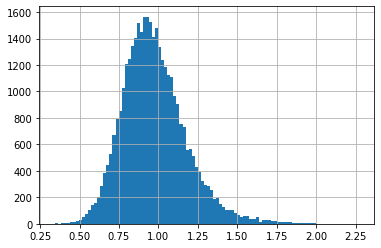

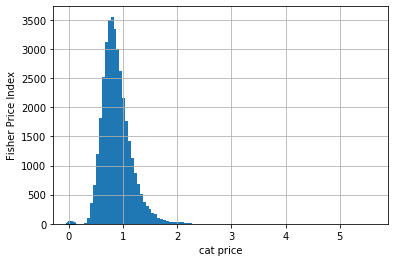

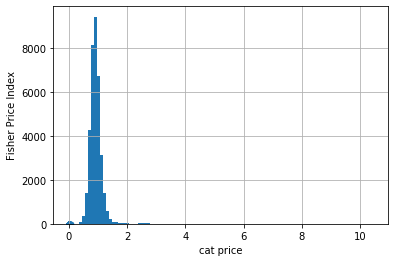

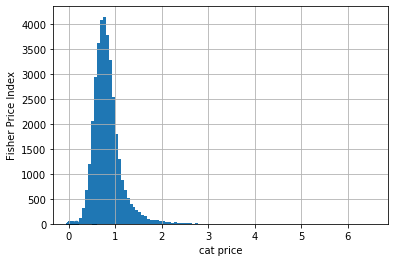

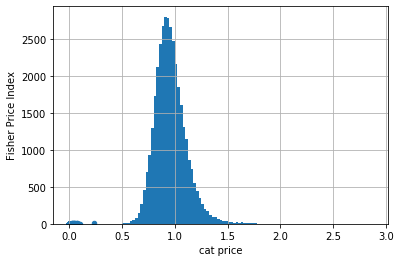

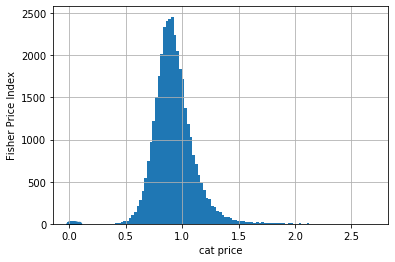

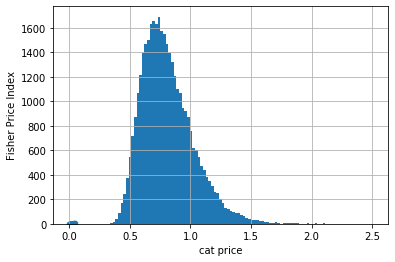

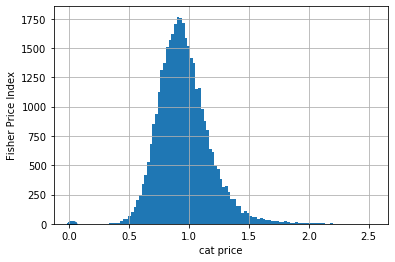

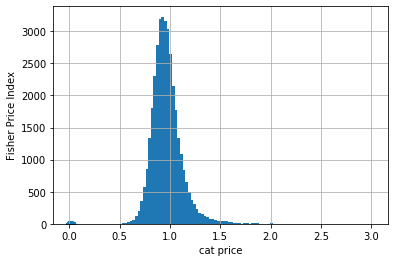

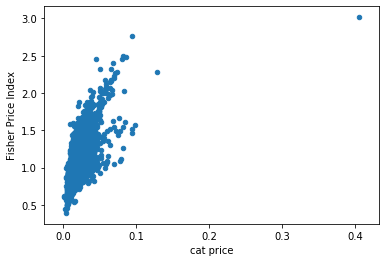

In [21]:
%%time
# AGGREGATE BRAND PRICES AND QUANTITIES FOR EACH YEAR-HOUSEHOLD 
# isolate category
for major in majors:
    print(major)
    sub = dff[dff['FS Major category'] == major].copy()

    # isolate top 100 brands (by % of purchasing households)
    top_100_brands = sub.groupby('BRAND')['HHID'].nunique().sort_values(ascending=False).head(100).index.tolist()

    # only use top 100 brands
    sub['BRAND 2'] = np.where(sub['BRAND'].isin(top_100_brands), sub['BRAND'], 'All other brands')

    # precompute repetitive calculations
    expenditures = sub.groupby(['YEAR-HHID', 'BRAND 2'])['EXP'].sum()
    purchase_volumes = sub.groupby(['YEAR-HHID', 'BRAND 2'])['PUR VOL'].sum()

    # iterate through year-households
    print('Data aggregation')
    ids = dff['YEAR-HHID'].unique()

    data = []
    count = 0
    for i in ids:
        count += 1
        if count % 1000 == 0:
            print(count)
        row = {}
        row['YEAR-HHID'] = i
        for brand in top_100_brands + ['All other brands']:
            try:
                row[brand + ' Q1'] = purchase_volumes[i][brand]/1000
            except:
                row[brand + ' Q1'] = 0

            try:
                row[brand + ' P1'] = expenditures[i][brand]/(purchase_volumes[i][brand]/1000)
            except:
                row[brand + ' P1'] = np.NaN

        data.append(row)

    result_df = pd.DataFrame(data)
    result_df = result_df[['YEAR-HHID'] + list(filter(lambda x: x != 'YEAR-HHID', result_df.columns.tolist()))]

    # adjust for outlying brand prices
    # for anything surpassing column mean by 5 SDs, reduce to the mean + 5 SDs
    lims = result_df.mean() + result_df.std()*5

    # this just changes <1% of all values, not a big diff
    for col in lims.index.tolist():
        lim = lims[col]
        result_df[col] = np.where(result_df[col]>lim, lim, result_df[col])

    #*************************************************************************************************** 
    print('Brand price imputation')
    # IMPUTE MISSING BRAND PRICES BASED ON YEAR, REGION, and HH SZ
    # merge required variables
    result_df = result_df.merge(demog[['YEAR-HHID', 'HH SZ']], on = 'YEAR-HHID', how = 'left')
    result_df = result_df.merge(dfpf[['YEAR-HHID', 'REGION 2']], on = 'YEAR-HHID', how = 'left')
    result_df['YEAR'] = result_df['YEAR-HHID'].str.split('|').str[0]

    # Create dummy variables
    year_dummies = pd.get_dummies(result_df['YEAR'], prefix='YEAR', drop_first=True)
    region_dummies = pd.get_dummies(result_df['REGION 2'], prefix='REGION 2', drop_first=True)
    result_df = pd.concat([result_df, year_dummies, region_dummies], axis=1)

    # Impute missing values for each "P1" column, using as many input variables as possible
    p1_columns = [col for col in result_df.columns if 'P1' in col]
    for col in p1_columns:
        feature_columns = ['HH SZ','YEAR', 'REGION 2','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019',
                           'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD'] 
        impute_missing_values(result_df, col, feature_columns)
        impute_missing_values2(result_df, col, feature_columns)
        impute_missing_values3(result_df, col, feature_columns)
        impute_missing_values4(result_df, col, feature_columns)

    #***************************************************************************************************  
    print('FPI calculation')
    # CALCULATE FISHER PRICE INDEX
    # Identify P1 and Q1 columns
    p1_columns = [col for col in result_df.columns if 'P1' in col]
    q1_columns = [col.replace('P1', 'Q1') for col in p1_columns]

    # Calculate P0 and Q0 using column means
    p0 = result_df[p1_columns].mean()
    q0 = result_df[q1_columns].mean()

    # Initialize lists to store the indices and their components for each row
    fisher_indices = []

    # Calculate Fisher Price Index for each row
    for i, row in result_df.iterrows():
        laspeyres_numerator = 0
        laspeyres_denominator = 0
        paasche_numerator = 0
        paasche_denominator = 0

        for p1_col, q1_col in zip(p1_columns, q1_columns):
            p1 = row[p1_col]
            q1 = row[q1_col]

            # Calculate Laspeyres components
            laspeyres_numerator += p1 * q0[q1_col]
            laspeyres_denominator += p0[p1_col] * q0[q1_col]

            # Calculate Paasche components
            paasche_numerator += p1 * q1
            paasche_denominator += p0[p1_col] * q1

        # Calculate Laspeyres and Paasche Price Indices for the row
        laspeyres_index = laspeyres_numerator / laspeyres_denominator
        paasche_index = paasche_numerator / paasche_denominator

        # Calculate Fisher Price Index for the row
        fisher_index = np.sqrt(laspeyres_index * paasche_index)

        # Append the indices and their components to their respective lists
        fisher_indices.append(fisher_index)

    # Add the indices and their components to the DataFrame
    result_df['Fisher Price Index'] = fisher_indices

    # adjust for outlying fisher price indexes
    #lim = result_df['Fisher Price Index'].mean() + result_df['Fisher Price Index'].std()*5
    #result_df['Fisher Price Index'] = np.where(result_df['Fisher Price Index']>lim, lim, result_df['Fisher Price Index'])

    #*************************************************************************************************** 
    # OUPUT IMPORTANT STUFF
    result_df = result_df.merge(seifa[['YEAR-HHID', 'SES']], on = 'YEAR-HHID', how = 'left')
    print(result_df['Fisher Price Index'].hist(bins=100));

    #print(result_df.groupby('SES')['Fisher Price Index'].mean())

    print(result_df['Fisher Price Index'].isnull().sum())

    see = pd.DataFrame(sub.groupby('YEAR-HHID')['EXP'].sum()/sub.groupby('YEAR-HHID')['PUR VOL'].sum()).reset_index()
    see.columns = ['YEAR-HHID', 'cat price']
    see = result_df.merge(see, on = 'YEAR-HHID', how = 'left')
    see.plot(kind='scatter', x='cat price', y='Fisher Price Index');

    # any empty fisher price indices are because the consumer didn't consume the category - impute median
    result_df['Fisher Price Index'] = result_df['Fisher Price Index'].fillna(result_df['Fisher Price Index'].median())

    result_df[['YEAR-HHID', 'Fisher Price Index']].to_csv('FI2' + major + '.csv', index=False)

# MINOR CATEGORIES

In [24]:
dff.head(1)

,BARCODE,BRAND,HHID,EXP,PUR VOL,FS Major category,cat,YEAR,YEAR-HHID
0,9300601417285,COLES FINEST,24882,9.0,1700.0,Meat and alternatives,Processed meat,2019,2019|24882


In [28]:
minors = ['Processed meat',
 'Vegetables',
 'Ready meals',
 'Non-sugar sweetened beverages',
 'Biscuits',
 'Fats and oils',
 'Pasta, rice, and other cereals',
 'Sauces, dressings, spreads, and dips',
 'Milk',
 'Fruit',
 'Sugar-based confectionery',
 'Desserts',
 'Breakfast cereals',
 'Cakes, muffins, and pastries',
 'Cheese and cream',
 'Sugar-sweetened beverages',
 'Nuts and seeds',
 'Tea and coffee',
 'Poultry',
 'Eggs',
 'Yoghurt',
 'Chocolate-based confectionery',
 'Sugars, honey, and related products',
 'Fish and seafoods',
 'Legumes/beans',
 'Snackfoods',
 'Bread',
 'Ice-cream',
 'Red meat']

Processed meat
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
328
Vegetables
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
47
Ready meals
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
353
Non-sugar sweetened beverages
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1759
Biscuits
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
282
Fats and oils
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
323
Pasta, rice, and other cereals
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
338
Sauces, dressings, spreads, and dips
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
100
Milk
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
160
Fruit
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
103
Sugar-based confectionery
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
2771
Desserts
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
5714
Breakfast cereals
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1792
Cakes, muffins, and pastries
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
2144
Cheese and cream
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
255
Sugar-sweetened beverages
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1745
Nuts and seeds
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
4728
Tea and coffee
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1375
Poultry
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation
AxesSubplot(0.125,0.125;0.775x0.755)
36208
Eggs
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
4055


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Yoghurt
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
3268


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Chocolate-based confectionery
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
659


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Sugars, honey, and related products
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
2335


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Fish and seafoods
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1804


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Legumes/beans
Data aggregation
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Brand price imputation
FPI calculation


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars


AxesSubplot(0.125,0.125;0.775x0.755)
1418


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


FileNotFoundError: [Errno 2] No such file or directory: 'FI2Legumes/beans.csv'

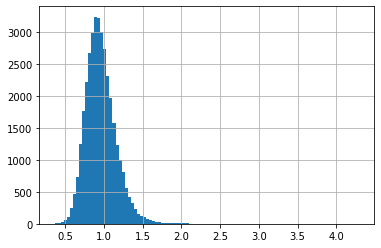

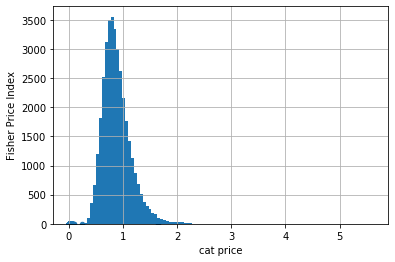

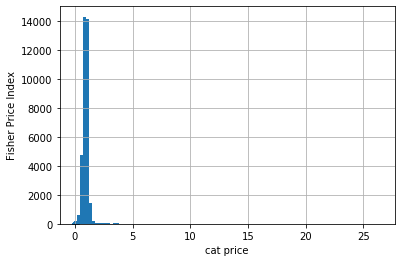

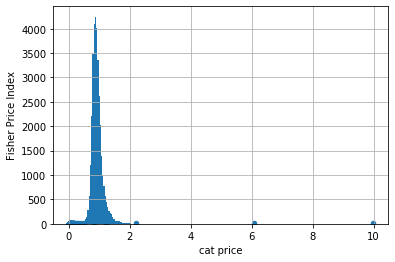

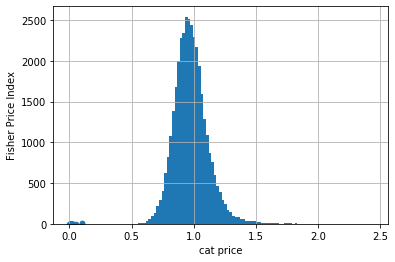

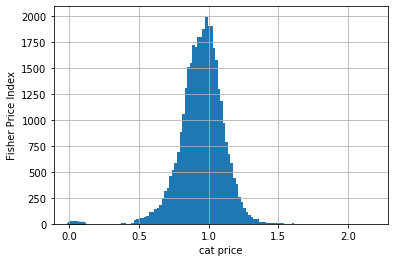

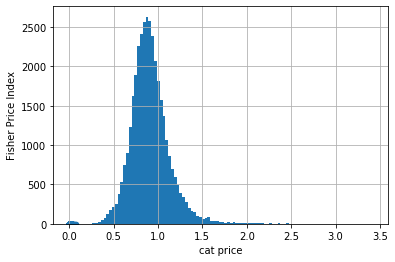

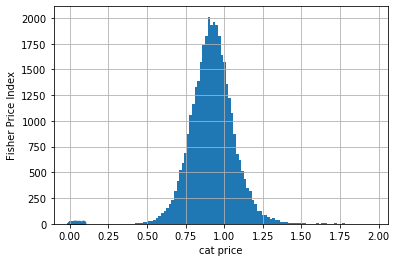

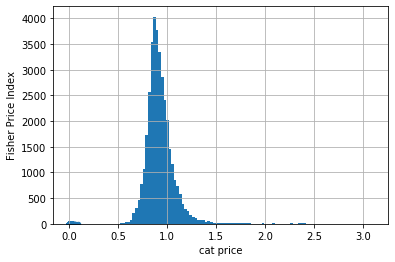

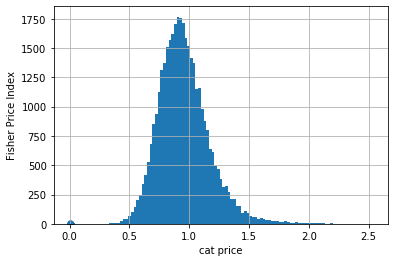

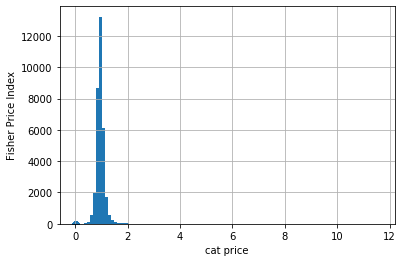

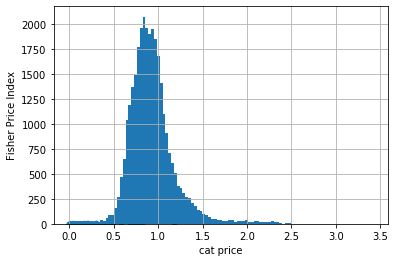

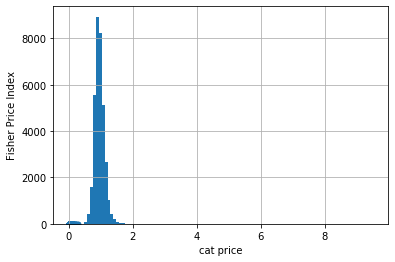

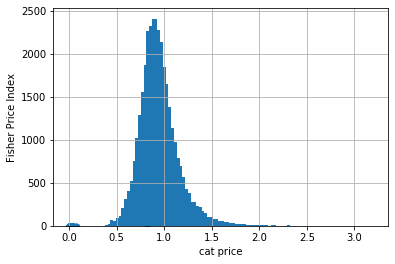

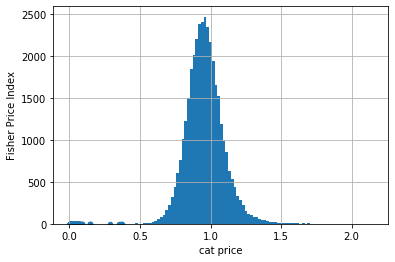

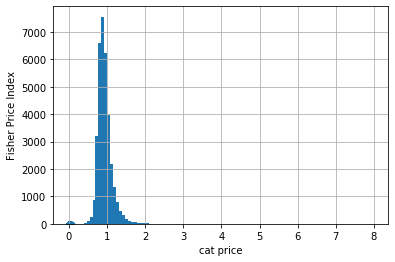

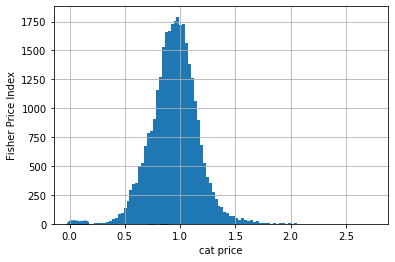

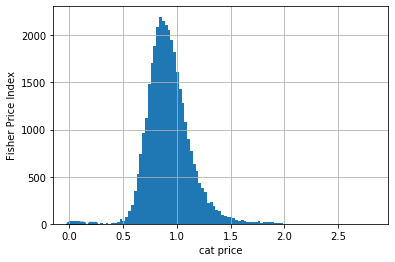

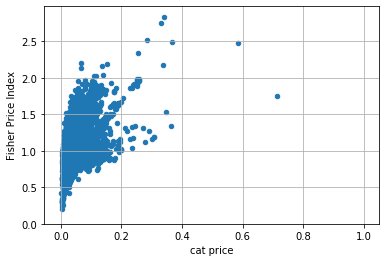

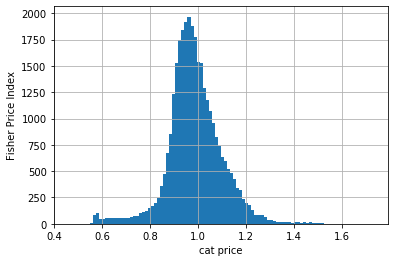

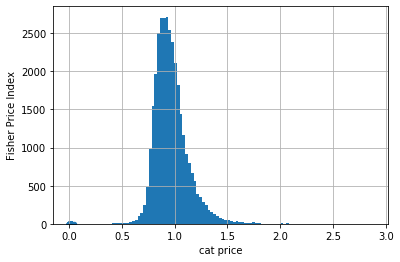

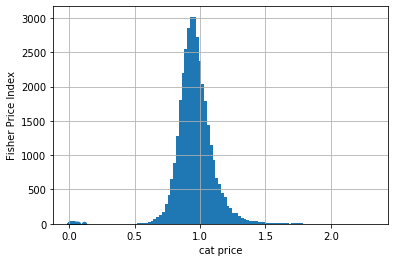

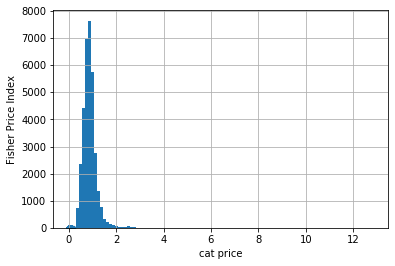

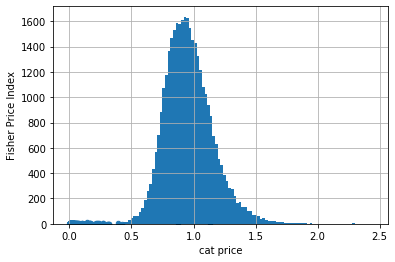

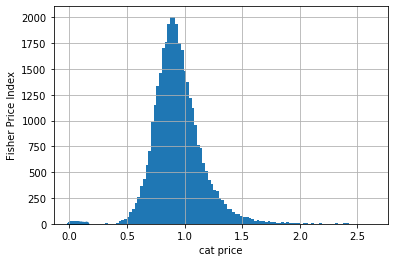

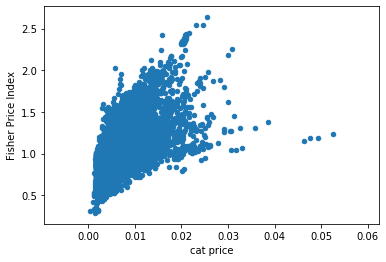

In [29]:
%%time
# AGGREGATE BRAND PRICES AND QUANTITIES FOR EACH YEAR-HOUSEHOLD 
# isolate category
for minor in minors:
    print(minor)
    sub = dff[dff['cat'] == minor].copy()

    # isolate top 100 brands (by % of purchasing households)
    top_100_brands = sub.groupby('BRAND')['HHID'].nunique().sort_values(ascending=False).head(100).index.tolist()

    # only use top 100 brands
    sub['BRAND 2'] = np.where(sub['BRAND'].isin(top_100_brands), sub['BRAND'], 'All other brands')

    # precompute repetitive calculations
    expenditures = sub.groupby(['YEAR-HHID', 'BRAND 2'])['EXP'].sum()
    purchase_volumes = sub.groupby(['YEAR-HHID', 'BRAND 2'])['PUR VOL'].sum()

    # iterate through year-households
    print('Data aggregation')
    ids = dff['YEAR-HHID'].unique()

    data = []
    count = 0
    for i in ids:
        count += 1
        if count % 1000 == 0:
            print(count)
        row = {}
        row['YEAR-HHID'] = i
        for brand in top_100_brands + ['All other brands']:
            try:
                row[brand + ' Q1'] = purchase_volumes[i][brand]/1000
            except:
                row[brand + ' Q1'] = 0

            try:
                row[brand + ' P1'] = expenditures[i][brand]/(purchase_volumes[i][brand]/1000)
            except:
                row[brand + ' P1'] = np.NaN

        data.append(row)

    result_df = pd.DataFrame(data)
    result_df = result_df[['YEAR-HHID'] + list(filter(lambda x: x != 'YEAR-HHID', result_df.columns.tolist()))]

    # adjust for outlying brand prices
    # for anything surpassing column mean by 5 SDs, reduce to the mean + 5 SDs
    lims = result_df.mean() + result_df.std()*5

    # this just changes <1% of all values, not a big diff
    for col in lims.index.tolist():
        lim = lims[col]
        result_df[col] = np.where(result_df[col]>lim, lim, result_df[col])

    #*************************************************************************************************** 
    print('Brand price imputation')
    # IMPUTE MISSING BRAND PRICES BASED ON YEAR, REGION, and HH SZ
    # merge required variables
    result_df = result_df.merge(demog[['YEAR-HHID', 'HH SZ']], on = 'YEAR-HHID', how = 'left')
    result_df = result_df.merge(dfpf[['YEAR-HHID', 'REGION 2']], on = 'YEAR-HHID', how = 'left')
    result_df['YEAR'] = result_df['YEAR-HHID'].str.split('|').str[0]

    # Create dummy variables
    year_dummies = pd.get_dummies(result_df['YEAR'], prefix='YEAR', drop_first=True)
    region_dummies = pd.get_dummies(result_df['REGION 2'], prefix='REGION 2', drop_first=True)
    result_df = pd.concat([result_df, year_dummies, region_dummies], axis=1)

    # Impute missing values for each "P1" column, using as many input variables as possible
    p1_columns = [col for col in result_df.columns if 'P1' in col]
    for col in p1_columns:
        feature_columns = ['HH SZ','YEAR', 'REGION 2','YEAR_2016', 'YEAR_2017','YEAR_2018','YEAR_2019',
                           'REGION 2_BRI','REGION 2_MEL','REGION 2_Other','REGION 2_PER','REGION 2_SYD'] 
        impute_missing_values(result_df, col, feature_columns)
        impute_missing_values2(result_df, col, feature_columns)
        impute_missing_values3(result_df, col, feature_columns)
        impute_missing_values4(result_df, col, feature_columns)

    #***************************************************************************************************  
    print('FPI calculation')
    # CALCULATE FISHER PRICE INDEX
    # Identify P1 and Q1 columns
    p1_columns = [col for col in result_df.columns if 'P1' in col]
    q1_columns = [col.replace('P1', 'Q1') for col in p1_columns]

    # Calculate P0 and Q0 using column means
    p0 = result_df[p1_columns].mean()
    q0 = result_df[q1_columns].mean()

    # Initialize lists to store the indices and their components for each row
    fisher_indices = []

    # Calculate Fisher Price Index for each row
    for i, row in result_df.iterrows():
        laspeyres_numerator = 0
        laspeyres_denominator = 0
        paasche_numerator = 0
        paasche_denominator = 0

        for p1_col, q1_col in zip(p1_columns, q1_columns):
            p1 = row[p1_col]
            q1 = row[q1_col]

            # Calculate Laspeyres components
            laspeyres_numerator += p1 * q0[q1_col]
            laspeyres_denominator += p0[p1_col] * q0[q1_col]

            # Calculate Paasche components
            paasche_numerator += p1 * q1
            paasche_denominator += p0[p1_col] * q1

        # Calculate Laspeyres and Paasche Price Indices for the row
        laspeyres_index = laspeyres_numerator / laspeyres_denominator
        paasche_index = paasche_numerator / paasche_denominator

        # Calculate Fisher Price Index for the row
        fisher_index = np.sqrt(laspeyres_index * paasche_index)

        # Append the indices and their components to their respective lists
        fisher_indices.append(fisher_index)

    # Add the indices and their components to the DataFrame
    result_df['Fisher Price Index'] = fisher_indices

    # adjust for outlying fisher price indexes
    #lim = result_df['Fisher Price Index'].mean() + result_df['Fisher Price Index'].std()*5
    #result_df['Fisher Price Index'] = np.where(result_df['Fisher Price Index']>lim, lim, result_df['Fisher Price Index'])

    #*************************************************************************************************** 
    # OUPUT IMPORTANT STUFF
    result_df = result_df.merge(seifa[['YEAR-HHID', 'SES']], on = 'YEAR-HHID', how = 'left')
    print(result_df['Fisher Price Index'].hist(bins=100));

    #print(result_df.groupby('SES')['Fisher Price Index'].mean())

    print(result_df['Fisher Price Index'].isnull().sum())

    see = pd.DataFrame(sub.groupby('YEAR-HHID')['EXP'].sum()/sub.groupby('YEAR-HHID')['PUR VOL'].sum()).reset_index()
    see.columns = ['YEAR-HHID', 'cat price']
    see = result_df.merge(see, on = 'YEAR-HHID', how = 'left')
    see.plot(kind='scatter', x='cat price', y='Fisher Price Index');

    # any empty fisher price indices are because the consumer didn't consume the category - impute median
    result_df['Fisher Price Index'] = result_df['Fisher Price Index'].fillna(result_df['Fisher Price Index'].median())

    result_df[['YEAR-HHID', 'Fisher Price Index']].to_csv('FI2' + minor + '.csv', index=False)